## Self Organizing Map (SOM)

10/22/2020

---

In [1]:
# Importing libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset

os.chdir('//Users/mareksturek/Documents/GitHub/deep-learning/data')
dataset = pd.read_csv('rawcreditcardapplications.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [3]:
# Create X, y

X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [4]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [5]:
# Training the SOM

from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

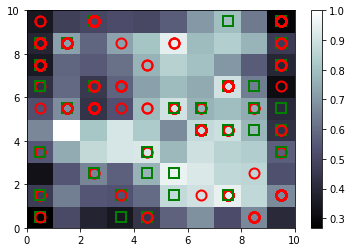

In [6]:
# Visualizing the results

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [10]:
# Finding the frauds

"""
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
"""

'\nmappings = som.win_map(X)\nfrauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)\nfrauds = sc.inverse_transform(frauds)\n'

In [12]:
# Printing the Fraud clients

"""
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))
"""

"\nprint('Fraud Customer IDs')\nfor i in frauds[:, 0]:\n  print(int(i))\n"